In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn

In [23]:
data = pd.read_csv('moore.csv',header=None).values

In [24]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [22]:
x = data[:,0].reshape(-1,1)
y = data[:,1].reshape(-1,1)

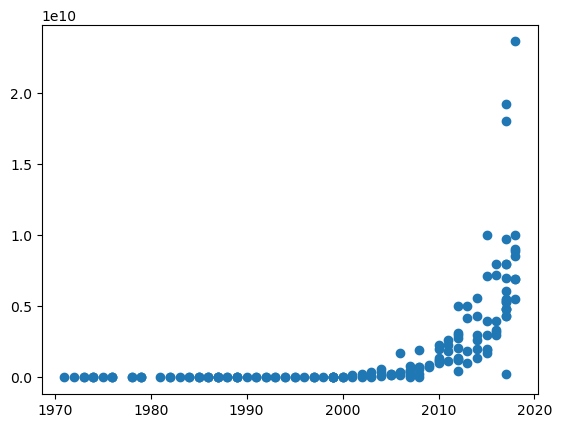

In [6]:
plt.scatter(x,y)

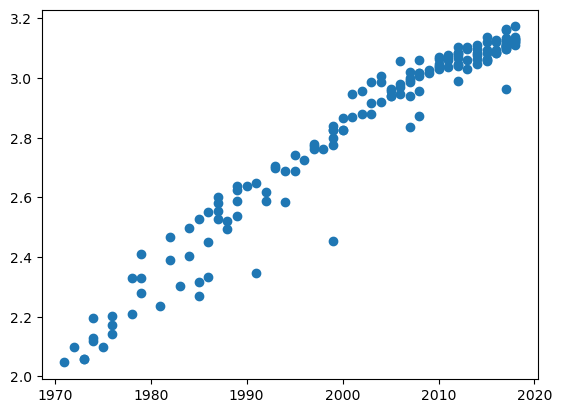

In [8]:
y = np.log(y)
plt.scatter(x,y)

In [9]:
xm = x.mean()
xstd = x.std()
ym = y.mean()
ystd = y.std()
x = (x-xm)/xstd
y = (y-ym)/ystd

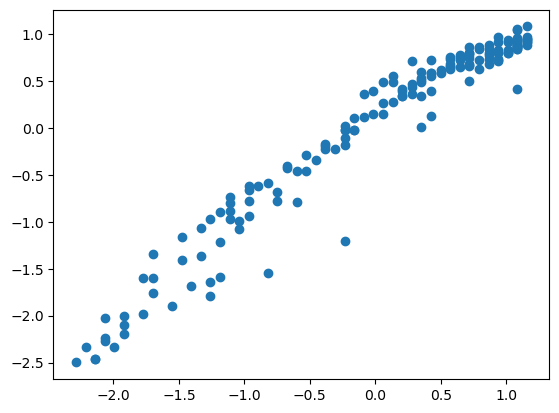

In [11]:
plt.scatter(x,y);

In [12]:
x = x.astype(np.float32)
y = y.astype(np.float32)

In [13]:
model = nn.Linear(1,1)

In [14]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.7)

In [15]:
inputs = torch.from_numpy(x)
targets = torch.from_numpy(y)

In [16]:
n_epochs = 100
losses = []
for it in range(n_epochs):
    optimizer.zero_grad()
    
    outputs = model(inputs)
    loss = criterion(outputs,targets)
    losses.append(loss.item())
    
    loss.backward()
    optimizer.step()
    
    print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/100, Loss: 0.7201
Epoch 2/100, Loss: 0.6937
Epoch 3/100, Loss: 0.6505
Epoch 4/100, Loss: 0.5981
Epoch 5/100, Loss: 0.5420
Epoch 6/100, Loss: 0.4859
Epoch 7/100, Loss: 0.4323
Epoch 8/100, Loss: 0.3826
Epoch 9/100, Loss: 0.3375
Epoch 10/100, Loss: 0.2973
Epoch 11/100, Loss: 0.2618
Epoch 12/100, Loss: 0.2308
Epoch 13/100, Loss: 0.2040
Epoch 14/100, Loss: 0.1809
Epoch 15/100, Loss: 0.1611
Epoch 16/100, Loss: 0.1442
Epoch 17/100, Loss: 0.1299
Epoch 18/100, Loss: 0.1177
Epoch 19/100, Loss: 0.1074
Epoch 20/100, Loss: 0.0987
Epoch 21/100, Loss: 0.0914
Epoch 22/100, Loss: 0.0852
Epoch 23/100, Loss: 0.0800
Epoch 24/100, Loss: 0.0757
Epoch 25/100, Loss: 0.0720
Epoch 26/100, Loss: 0.0689
Epoch 27/100, Loss: 0.0663
Epoch 28/100, Loss: 0.0642
Epoch 29/100, Loss: 0.0624
Epoch 30/100, Loss: 0.0608
Epoch 31/100, Loss: 0.0596
Epoch 32/100, Loss: 0.0585
Epoch 33/100, Loss: 0.0576
Epoch 34/100, Loss: 0.0568
Epoch 35/100, Loss: 0.0562
Epoch 36/100, Loss: 0.0557
Epoch 37/100, Loss: 0.0553
Epoch 38/1

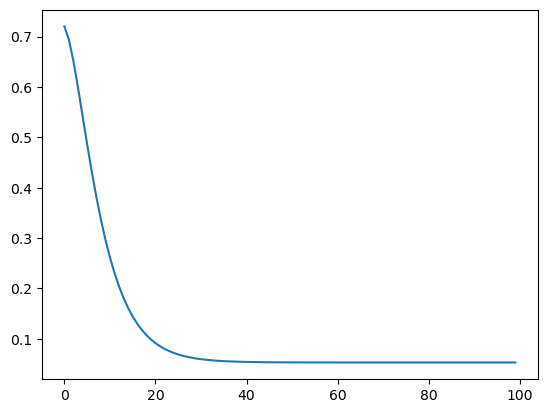

In [17]:
plt.plot(losses)

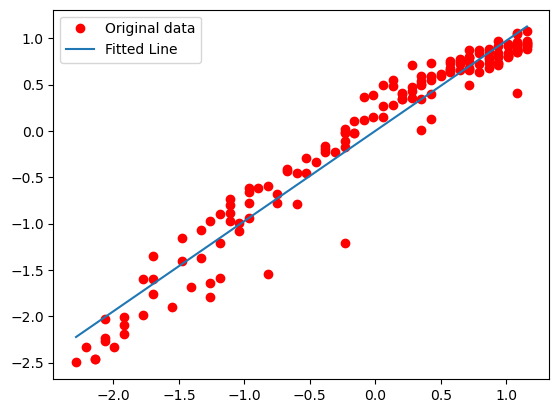

In [18]:
predicted = model(torch.from_numpy(x)).detach().numpy()
plt.plot(x,y,'ro',label = 'Original data')
plt.plot(x,predicted, label='Fitted Line')
plt.legend()
plt.show()

In [25]:
w = model.weight.data.numpy()

In [27]:
print(w)

[[0.9729978]]


In [34]:
a = w[0,0] * ystd / xstd

In [35]:
print(a)

0.022435354884986887


In [33]:
print('Time doubled:', np.log(2) / a)

Time doubled: 30.89530716644826
